Consider a 5-armed stochastic bandit problem with mean rewards of (0.1, 0.1, 0 1, 0.1, 0.9).The arms are Bernoulli.

In [ ]:
arm_index=[0,1,2,3,4]
mean_values = [0.1, 0.1, 0.1, 0.1, 0.9]

In [ ]:
import random
class BernoulliArm():
    def __init__(self, p):
        self.p = p

    def draw(self):
        if random.random() > self.p:
            return 0.0 #,self.p;
        else:
            return 1.0 #,self.p;


In [ ]:
import os
import sys

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

##Epsilon Greedy Algorithm

In [ ]:
#Epsilon Greedy class
class Epsilon_Greedy_Algorithm:
    def __init__(self, epsilon, counts=None, values=None):
        self.epsilon_values = epsilon
        self.counts_of_pull = counts
        self.mean_values = values

    def initialize(self, number_of_arms):
        self.counts_of_pull = np.zeros(number_of_arms, dtype=int)
        self.mean_values = np.zeros(number_of_arms, dtype=float)

    def selecting_arm(self):
        z = np.random.random()
        if z > self.epsilon_values:
            # Picking best arm
            return np.argmax(self.mean_values)
        # Randomly pick any arm with prob 1 / len(self.counts)
        return np.random.randint(0, len(self.mean_values))

    def selecting_max_reward_arm(self):
        return np.argmax(self.mean_values)

    def selecting_max_reward(self):
        # Picking best arm reward
        return np.max(self.mean_values)

    def update_values(self, arm_chosen, reward):
        # Increment chosen arm's count by one
        self.counts_of_pull[arm_chosen] += 1
        n = self.counts_of_pull[arm_chosen]

        # Recompute the estimated value of chosen arm using new reward
        value = self.mean_values[arm_chosen]
        new_value = value * ((n - 1) / n) + reward / n
        self.mean_values[arm_chosen] = new_value
    

###Function for testing Epsilon Greedy Algorithm

In [ ]:
def test_algorithm(algo, arms, num_simulations, horizon):
    # Initialize rewards and chosen_arms with zero 2d arrays
    chosen_arms = np.zeros((num_simulations, horizon))
    rewards = np.zeros((num_simulations, horizon))
    chosen_max_reward_arms= np.zeros((num_simulations, horizon))
    regrets= np.zeros((num_simulations, horizon))
    prob_of_optimal_arm= np.zeros((num_simulations, horizon))

    # Loop over all simulations
    for sim in range(num_simulations):
        # Re-initialize the algorithm counts and mean_values arrays
        algo.initialize(len(arms))

        count=0
        count_best_arm=0

        # Loop over all time horizon #No. of times the arm is to be pulled in a simulation
        for t in range(horizon):
            # Select arm based on the algorithm chosen
            arm_chosen = algo.selecting_arm()
            chosen_arms[sim, t] = arm_chosen

            count +=1

            #selecting maximum reward arm
            chosen_max_reward_arm= algo.selecting_max_reward_arm()
            chosen_max_reward_arms[sim,t]=chosen_max_reward_arm

            if arm_chosen== chosen_max_reward_arm:
               count_best_arm +=1

            probability_optimal_arm= count_best_arm / count  
            prob_of_optimal_arm[sim, t] = probability_optimal_arm

            # Draw from the Bernoulli distribution to get rewards
            reward = arms[arm_chosen].draw()
            rewards[sim, t] = reward

            #Computing regret
            a= algo.selecting_max_reward()
          
            # Update the algorithms' count and estimated values
            algo.update_values(arm_chosen, reward)

            b= mean_values[arm_chosen] 
            
            regret= a-b
            regrets[sim,t]= regret

    # Average rewards,regret across all sims and compute cumulative rewards, cumulative regret
    average_rewards = np.mean(rewards, axis=0)  #Axis=0 is across columns(for particular time in every simulation) calculate mean. Output is list giving mean reward(across sims) at every time horizon 
    cumulative_rewards = np.cumsum(average_rewards) #Output is list giving the cumulative sum of rewards at every time horizon.
    
    average_regrets = np.mean(regrets, axis=0)
    cumulative_regrets = np.cumsum(average_regrets)
    
    #Probability of selecting the best arm
    prob_of_optimal_arm= np.mean(prob_of_optimal_arm, axis=0)

    return chosen_arms, average_rewards, cumulative_rewards,average_regrets, cumulative_regrets, prob_of_optimal_arm

#UCB Algorithm

In [ ]:
#Upper confidence Bound class
import math
class UCB:
    def __init__(self, counts=None, values=None):
        self.counts_of_pull = counts
        self.mean_values = values

    def initialize(self,number_of_arms):
        self.counts_of_pull = np.zeros(number_of_arms, dtype=int)
        self.mean_values = np.zeros(number_of_arms, dtype=float)
 
    # UCB arm selection based on max of UCB reward of each arm
    def selecting_arm(self):
        number_of_arms = len(self.counts_of_pull)
        for arm in range(number_of_arms):
            if self.counts_of_pull[arm] == 0:
                return arm
    
        ucb_values = [0.0 for arm in range(number_of_arms)]
        total_counts = sum(self.counts_of_pull)
        
        for arm in range(number_of_arms):
            bonus = math.sqrt((2 * math.log(total_counts)) / float(self.counts_of_pull[arm]))
            ucb_values[arm] = self.mean_values[arm] + bonus
        return ucb_values.index(max(ucb_values))

    def selecting_max_reward_arm(self):
        return np.argmax(self.mean_values)

    def selecting_max_reward(self):
        # Pick the best arm
        return np.max(self.mean_values)

    def update_values(self, arm_chosen, reward):
        # Increment chosen arm's count by one
        self.counts_of_pull[arm_chosen] += 1
        n = self.counts_of_pull[arm_chosen]

        # Recompute the estimated value of chosen arm using new reward
        value = self.mean_values[arm_chosen]
        new_value = value * ((n - 1) / n) + reward / n
        self.mean_values[arm_chosen] = new_value
    

##Thompson Sampling Algorithm

In [ ]:
from scipy.stats import beta
#Thompson Sampling Algorithm class
class Thompson_sampling:
    def __init__(self, counts=None, values=None):
        self.counts_of_pull = counts
        self.mean_values = values

    def initialize(self,number_of_arms):
        self.counts_of_pull = np.zeros(number_of_arms, dtype=int)
        self.mean_values = np.zeros(number_of_arms, dtype=float)
 
     # Uniform distribution of prior beta (A,B)
        self.a = [1 for arm in range(number_of_arms)]
        self.b = [1 for arm in range(number_of_arms)]
        return
    
    # Thompson Sampling selection of arm for each round
    def selecting_arm(self):
        number_of_arms = len(self.counts_of_pull)
        
        # Pair up all beta params of a and b for each arm
        beta_params = zip(self.a, self.b)
        
        # Perform random draw for all arms based on their params (a,b)
        all_draws = [beta.rvs(i[0], i[1], size = 1) for i in beta_params]
        
        # return index of arm with the highest draw
        return all_draws.index(max(all_draws))

    def selecting_max_reward_arm(self):
        return np.argmax(self.mean_values)

    def selecting_max_reward(self):
        # Pick the best arm
        return np.max(self.mean_values) 

    def update_values(self, arm_chosen, reward):
        # Increment chosen arm's count by one
        self.counts_of_pull[arm_chosen] += 1
        n = self.counts_of_pull[arm_chosen]

        # Recompute the estimated value of chosen arm using new reward
        value = self.mean_values[arm_chosen]
        new_value = value * ((n - 1) / n) + reward / n
        self.mean_values[arm_chosen] = new_value
        
         # Update a and b
        # a is based on total counts of rewards of arm
        self.a[arm_chosen] = self.a[arm_chosen] + reward
        
        # b is based on total counts of failed rewards on arm
        self.b[arm_chosen] = self.b[arm_chosen] + (1-reward)
        
        return

Executing Epsilon Greedy algorithm defined above

In [ ]:
np.random.seed(1)
number_of_arms = len(mean_values)

# Shuffle the arms
np.random.shuffle(mean_values)
print(mean_values)
# Each arm will follow and Bernoulli distribution
arms = list(map(lambda mu: BernoulliArm(mu), mean_values))
# Get the index of the best arm to test if algorithm will be able to learn that
best_arm_index = np.argmax(mean_values)
# Define epsilon value to check the performance of the algorithm using each one
epsilon = [0.1, 0.2, 0.3, 0.4, 0.5]
epsilon

[0.1, 0.1, 0.9, 0.1, 0.1]


[0.1, 0.2, 0.3, 0.4, 0.5]

In [ ]:
results_epsilon_greedy=[]
for epsilon in [0.1, 0.2, 0.3, 0.4, 0.5]:
    algo = Epsilon_Greedy_Algorithm(epsilon, [], [])
    algo.initialize(number_of_arms)
    results = test_algorithm(algo, arms, 100, 250)  #100 is no. of simulations and 250 is times the arm is pulled in one simulation
    results_epsilon_greedy.append(results[4]) #4 is for extracting cumulative regret
    
results_epsilon_greedy  

[array([-1.08000000e-01, -1.02000000e-01, -7.80000000e-02, -8.13333333e-02,
        -8.13333333e-02, -8.53333333e-02, -7.01666667e-02, -9.08095238e-02,
        -6.13452381e-02, -3.20634921e-02, -2.64246032e-02, -6.73701299e-03,
         9.75216450e-03, -2.14465534e-02,  6.48781774e-03,  2.45687368e-02,
         4.82239011e-02,  7.33188282e-02,  1.09108320e-01,  1.41531142e-01,
         1.70504835e-01,  1.95430234e-01,  2.19303661e-01,  2.61079567e-01,
         3.06771417e-01,  3.34043597e-01,  3.96709166e-01,  4.21970502e-01,
         4.34093999e-01,  4.70386921e-01,  4.81362752e-01,  5.06277673e-01,
         5.27525519e-01,  5.64450917e-01,  6.18620781e-01,  6.47365400e-01,
         6.74983508e-01,  7.34588315e-01,  7.68418849e-01,  7.80085433e-01,
         8.17860067e-01,  8.50387066e-01,  8.85902426e-01,  9.34621521e-01,
         9.64981784e-01,  1.00349693e+00,  1.02971936e+00,  1.06066157e+00,
         1.11859862e+00,  1.14577846e+00,  1.15765417e+00,  1.21230068e+00,
         1.2

Plotting epsilon greedy algorithm defined above for various values of epsilon

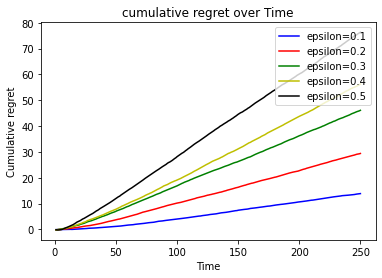

In [ ]:
x=[i for i in range(1,250+1)]
y=results_epsilon_greedy

plt.plot(x,y[0],'b',label='epsilon=0.1') #Blue curve with epsilon=0.1

plt.xlabel('Time') 

plt.ylabel('Cumulative regret')   

plt.title('cumulative regret over Time') 

plt.plot(x,y[1],'r',label='epsilon=0.2') #Red curve with epsilon=0.2
plt.plot(x,y[2],'g',label='epsilon=0.3') #Green curve with epsilon=0.3
plt.plot(x,y[3],'y',label='epsilon=0.4') #Yellow curve with epsilon=0.4
plt.plot(x,y[4],'black',label='epsilon=0.5') #Black curve with epsilon=0.5

plt.legend(loc='upper right')

# function to show the plot 
plt.show() 

###Probability of selecting best arm in epsilon greedy

In [ ]:
results_epsilon_greedy_prob_best_arm=[]
for epsilon in [0.1, 0.2, 0.3, 0.4, 0.5]:
    algo = Epsilon_Greedy_Algorithm(epsilon, [], [])
    algo.initialize(number_of_arms)
    results = test_algorithm(algo, arms, 100, 250)  #100 is no. of simulations and 250 is times the arm is pulled in one simulation
    results_epsilon_greedy_prob_best_arm.append(results[5]) #5 is for prob. of selecting best arm
    
results_epsilon_greedy_prob_best_arm  

[array([0.92      , 0.93      , 0.92      , 0.93      , 0.918     ,
        0.92166667, 0.91285714, 0.9125    , 0.91666667, 0.919     ,
        0.92090909, 0.9225    , 0.92461538, 0.92428571, 0.926     ,
        0.926875  , 0.92588235, 0.92388889, 0.92421053, 0.9245    ,
        0.92619048, 0.92409091, 0.9226087 , 0.92166667, 0.9236    ,
        0.92461538, 0.92444444, 0.92571429, 0.92655172, 0.92633333,
        0.92580645, 0.925625  , 0.92515152, 0.925     , 0.924     ,
        0.925     , 0.92594595, 0.92631579, 0.92589744, 0.9245    ,
        0.92341463, 0.92285714, 0.92348837, 0.92340909, 0.92266667,
        0.92195652, 0.92212766, 0.92166667, 0.92183673, 0.9214    ,
        0.92176471, 0.92269231, 0.92245283, 0.92111111, 0.92054545,
        0.92053571, 0.92035088, 0.92051724, 0.92084746, 0.92083333,
        0.91967213, 0.91903226, 0.91936508, 0.91890625, 0.91907692,
        0.91893939, 0.91865672, 0.91926471, 0.91927536, 0.91928571,
        0.91915493, 0.91944444, 0.9190411 , 0.91

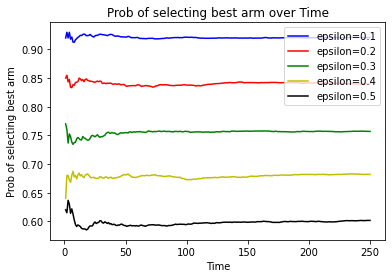

In [ ]:
x=[i for i in range(1,250+1)]
y=results_epsilon_greedy_prob_best_arm

plt.plot(x,y[0],'b',label='epsilon=0.1') #Blue curve with epsilon=0.2

plt.xlabel('Time') 

plt.ylabel('Prob of selecting best arm')   

plt.title('Prob of selecting best arm over Time') 

plt.plot(x,y[1],'r',label='epsilon=0.2') #Red curve with epsilon=0.2
plt.plot(x,y[2],'g',label='epsilon=0.3') #Green curve with epsilon=0.3
plt.plot(x,y[3],'y',label='epsilon=0.4') #Yellow curve with epsilon=0.4
plt.plot(x,y[4],'black',label='epsilon=0.5') #Black curve with epsilon=0.5

plt.legend(loc='upper right')

# function to show the plot 
plt.show() 

Executing UCB1 algorithm defined above

In [ ]:
algo = UCB([], [])
algo.initialize(number_of_arms)
#results_UCB = test_algorithm_UCB(algo, arms, 100, 250)  #100 is no. of simulations and 250 is times the arm is pulled in one simulation
results_UCB = test_algorithm(algo, arms, 100, 250)
results_UCB[4] 

array([-0.1       , -0.09      , -0.79      ,  0.05      ,  0.89      ,
        1.148     ,  1.403     ,  1.56566667,  2.11466667,  2.83166667,
        3.51666667,  4.17166667,  4.25433333,  4.6115    ,  4.73566667,
        4.86930952,  4.99945238,  5.27325794,  5.68127381,  6.12428968,
        6.67937266,  7.21378427,  7.61519589,  7.97402886,  8.1441912 ,
        8.23598662,  8.29790748,  8.36971884,  8.51911035,  8.72227171,
        9.01099987,  9.23508452,  9.6016396 ,  9.9836572 , 10.35741664,
       10.75734841, 11.02337363, 11.31376062, 11.53465504, 11.68572776,
       11.84542351, 12.00421066, 12.04233789, 12.14393942, 12.33261692,
       12.5301561 , 12.69416489, 12.89815784, 13.10260467, 13.33090813,
       13.52753941, 13.81175038, 14.08820845, 14.37325711, 14.54753988,
       14.73829504, 14.88824684, 15.03753923, 15.15529393, 15.28103829,
       15.39072633, 15.58911783, 15.7476553 , 15.88216684, 15.95290043,
       16.06365906, 16.23873427, 16.38295578, 16.4719902 , 16.64

No handles with labels found to put in legend.


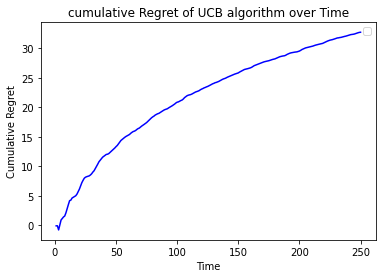

In [ ]:
x=[i for i in range(1,250+1)]
y=results_UCB[4]

plt.plot(x,y,'b')

plt.xlabel('Time') 

plt.ylabel('Cumulative Regret')   

plt.title('cumulative Regret of UCB algorithm over Time') 

plt.legend(loc='upper right')

# function to show the plot 
plt.show() 

###Executing Thompson Sampling Algorithm

In [ ]:
algo = Thompson_sampling([], [])
algo.initialize(number_of_arms)
results_Thompson_sampling = test_algorithm(algo, arms, 100, 250)  #100 is no. of simulations and 250 is times the arm is pulled in one simulation
results_Thompson_sampling[4] 

array([-0.292     , -0.254     , -0.039     ,  0.157     ,  0.50816667,
        0.87316667,  1.28433333,  1.55683333,  1.83283333,  2.04339286,
        2.22747222,  2.37730159,  2.57535678,  2.74809848,  2.85942413,
        2.98643448,  3.09858627,  3.23168662,  3.29710163,  3.32960698,
        3.3733021 ,  3.43115634,  3.47764522,  3.5145252 ,  3.58100825,
        3.64117972,  3.72424258,  3.77896129,  3.82067649,  3.88650211,
        3.90451421,  3.93983386,  3.9837076 ,  4.00311591,  4.03820461,
        4.05673303,  4.1007631 ,  4.12903917,  4.17455326,  4.22969479,
        4.28474852,  4.33316783,  4.35094765,  4.39240012,  4.42495176,
        4.44034462,  4.44726625,  4.49483003,  4.50357867,  4.5117932 ,
        4.55128956,  4.58190974,  4.62136994,  4.64585051,  4.67140841,
        4.67238133,  4.69716249,  4.72231416,  4.7316187 ,  4.74807491,
        4.76492377,  4.77354781,  4.78976992,  4.79812512,  4.83807453,
        4.8690124 ,  4.87731658,  4.88630057,  4.90263251,  4.91

####Plotting  Thompson Sampling algorithm

No handles with labels found to put in legend.


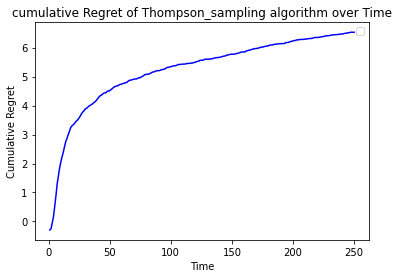

In [ ]:

x=[i for i in range(1,250+1)]
y=results_Thompson_sampling[4]

plt.plot(x,y,'b')

plt.xlabel('Time') 

plt.ylabel('Cumulative Regret')   

plt.title('cumulative Regret of Thompson_sampling algorithm over Time') 

plt.legend(loc='upper right')

# function to show the plot 
plt.show() 

cumulative regret for e-greedy has a steeper slope than Thompson. 
We can also see that the regret minimises and converges better with Thompson.
With Thompson the agent regrets less because it can better identify the best variant and is more likely to explore those variants that are strong performers — this makes the Thompson bandit particular well suited to more advanced use cases that may involve statistical models or neural nets in the choice of k.